# Data Type Corrections for Medical Dataset

This notebook implements Task 1 of the assignment, focusing on examining and correcting data types in the medical dataset.

## Import Required Libraries

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
from pandas.api.types import CategoricalDtype

warnings.filterwarnings("ignore")

## Load and Display Initial Data

In [ ]:
# Load the dataset
### TODO - prep this for Juypter
df = pd.read_excel("~\\Documents\\www\\qut\\assignment1\\medical-dataset.xlsx")

print("--- Initial Data Types ---")
df.dtypes

In [ ]:
# Check data type of 'insurance' column
print("Data type of 'insurance' column:", df['insurance'].dtype)

# Check for missing values
print("Number of missing values in 'insurance' column:", df['insurance'].isnull().sum())

# Display the first few rows of the 'insurance' column
print("First few rows of 'insurance' column:")
print(df['insurance'].head())

# Display the last few rows of the 'insurance' column
print("Last few rows of 'insurance' column:")
print(df['insurance'].tail())

In [ ]:
df['insurance'].value_counts()

## Task 1: Data Type Corrections

We'll now implement the necessary data type corrections for each variable in the dataset.

### 1. Date Conversion

In [176]:
def convert_date(date_str):
    if pd.isna(date_str):
        return pd.NaT
    try:
        for fmt in ['%Y-%m-%d %H:%M:%S', '%d/%m/%Y', '%Y-%m-%d']:
            try:
                return pd.to_datetime(date_str, format=fmt)
            except:
                continue
        return pd.to_datetime(date_str, infer_datetime_format=True)
    except:
        return pd.NaT

df['survey_date'] = df['survey_date'].apply(convert_date)

### 2. Age - Convert to Ordered Categorical

In [ ]:
df['age'] = df['age'].replace("100_110", "90_plus")
age_order = ['0_10', '10_20', '20_30', '30_40', '40_50', '50_60', 
             '60_70', '70_80', '80_90', '90_plus']
age_dtype = pd.api.types.CategoricalDtype(categories=age_order, ordered=True)
df['age'] = df['age'].astype(age_dtype)

# Display age categories and their counts
print("Age Categories:")
print(df['age'].cat.categories)
print("\nAge Value Counts:")
df['age'].value_counts(sort=False)

### 3. Gender - Convert to Nominal Categorical

In [ ]:
df['gender'] = df['gender'].astype('category')
print("Gender Categories:")
df['gender'].value_counts()


### 4. Region and Country - Convert to Categorical with 'Unknown'

In [ ]:
for col in ['region', 'country']:
    df[col] = df[col].astype('category')
    if 'Unknown' not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories('Unknown')
    df[col] = df[col].fillna('Unknown')
    
    print(f"\n{col.capitalize()} Categories:")
    print(df[col].value_counts())

### 5. Height and Weight - Convert to Integer

In [ ]:
df['height'] = df['height'].astype('Int64')  # Using Int64 to handle NaN values
df['weight'] = df['weight'].astype('Int64')

print("Height Summary:")
print(df['height'].describe())
print("\nWeight Summary:")
print(df['weight'].describe())

### 6. BMI - Keep as Float

In [ ]:
df['bmi'] = df['bmi'].astype('float64')
print("BMI Summary:")
df['bmi'].describe()

### 7. Blood Type - Convert to Categorical with 'Unknown'

In [ ]:
df['blood_type'] = df['blood_type'].astype('category')
if 'Unknown' not in df['blood_type'].cat.categories:
    df['blood_type'] = df['blood_type'].cat.add_categories('Unknown')
df['blood_type'] = df['blood_type'].fillna('Unknown')

print("Blood Type Categories:")
df['blood_type'].value_counts()

### 8. Insurance - Convert to Boolean with NA for Blank and Unknown

In [ ]:
df['insurance'] = df['insurance'].str.title()
df['insurance'] = df['insurance'].map({'Yes': True, 'No': False, 'Blank': pd.NA, 'Unknown': pd.NA})
print("Insurance Value Counts:")
df['insurance'].value_counts()

### 9. Income - Convert to Categorical

In [ ]:
df['income'] = df['income'].astype('category')
print("Income Categories:")
df['income'].value_counts()

### 10. Smoking - Convert to Categorical with Bins

In [ ]:
smoking_bins = {
    'quit0': 'Former Smoker',
    'quit5': 'Former Smoker',
    'quit10': 'Former Smoker',
    'vape': 'Vape User',
    'yesheavy': 'Heavy Smoker',
    'light': 'Light Smoker',
    'medium': 'Medium Smoker',
    'never': 'Never Smoked',
    -1: 'Unknown'
}
df['smoking'] = df['smoking'].replace(smoking_bins)
df['smoking'] = df['smoking'].astype('category')

print("Smoking Categories:")
df['smoking'].value_counts()

### 11. Alcohol - Convert to Categorical Ordinal

In [ ]:
df['alcohol'] = df['alcohol'].replace(-1, 'Unknown')
df['alcohol'] = df['alcohol'].astype('category')

print("Alcohol Categories:")
df['alcohol'].value_counts()

### 12. Cocaine - Convert to Categorical with Unknown

In [ ]:
df['cocaine'] = df['cocaine'].replace(-1, 'Unknown')
df['cocaine'] = df['cocaine'].astype('category')

print("Cocaine Categories:")
df['cocaine'].value_counts()

### 13. Contact Counts - Convert to Int64

In [ ]:
df['contacts_count'] = df['contacts_count'].astype('Int64')
df['public_transport_count'] = df['public_transport_count'].astype('Int64')

print("Contacts Count Summary:")
print(df['contacts_count'].describe())
print("\nPublic Transport Count Summary:")
print(df['public_transport_count'].describe())

### 14. Working - Convert to Categorical

In [ ]:
df['working'] = df['working'].astype('category')
print("Working Status Categories:")
df['working'].value_counts()

### 15. Worried - Convert to Integer

In [ ]:
df['worried'] = df['worried'].astype('Int64')
print("Worried Level Summary:")
df['worried'].describe()

### 16. Health Conditions - Convert to Boolean

In [ ]:
health_conditions = [
    'covid19_positive', 'covid19_symptoms', 'covid19_contact',
    'asthma', 'kidney_disease', 'liver_disease', 'compromised_immune',
    'heart_disease', 'lung_disease', 'diabetes', 'hiv_positive',
    'other_chronic', 'nursing_home', 'health_worker'
]

for col in health_conditions:
    df[col] = df[col].astype('bool')
    
print("Health Conditions Summary:")
for col in health_conditions:
    print(f"\n{col}:")
    print(df[col].value_counts())

### 17. Risk Values - Convert to Float and Normalize

In [ ]:
df['risk_infection'] = df['risk_infection'].astype('float64') / 100
df['risk_mortality'] = df['risk_mortality'].astype('float64') / 100

print("Risk Infection Summary:")
print(df['risk_infection'].describe())
print("\nRisk Mortality Summary:")
print(df['risk_mortality'].describe())

### 18. Drop longitude and latitude due to no meaningful significance

In [77]:
df.drop(columns=['ip_longitude', 'ip_latitude'], inplace=True)

## Final Data Types Check

In [ ]:
print("Final Data Types:")
df.dtypes

## Task 2 - Data Preparation - Identify issues and clean/transform

### 1. Identify Skewness in Numerical Variables

In [ ]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
skewness_results = {}

for col in numerical_cols:
    if col in df.columns:
        skewness = df[col].skew()
        skewness_results[col] = skewness
        print(f"{col}: {skewness:.3f}")

# Visualize distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(['height', 'weight', 'bmi', 'contacts_count', 'public_transport_count', 'worried', 'risk_infection', 'risk_mortality'], 1):
    plt.subplot(4, 2, i)
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col} (Skewness: {df[col].skew():.3f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### 2. Identify Missing Values and Errors

In [ ]:
print("Checking Missing Values in Each Column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Visualise the missing data...


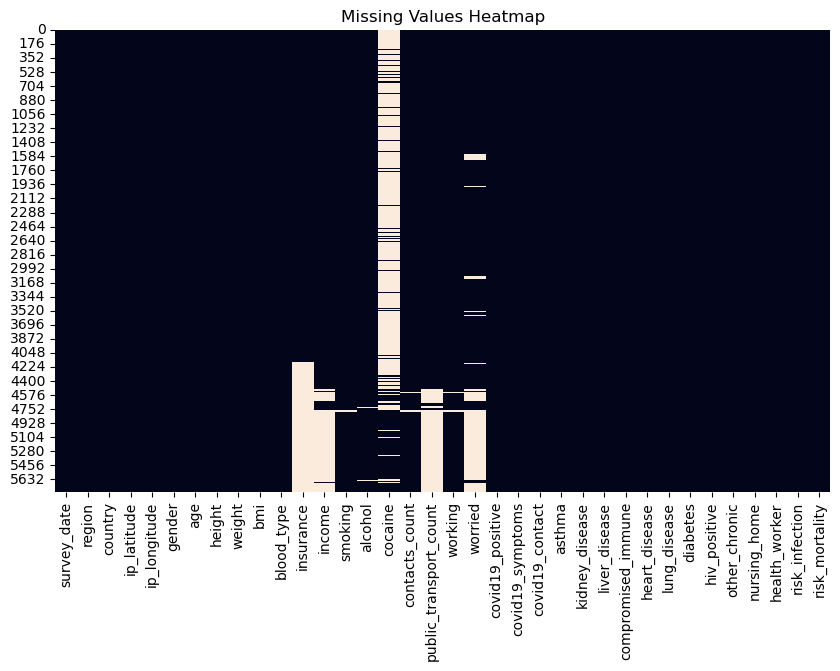

In [200]:
print("Visualise the missing data...")
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


survey_date                  0
region                       0
country                      0
ip_latitude                  0
ip_longitude                 0
gender                       0
age                          0
height                       0
weight                       0
bmi                          0
blood_type                   0
insurance                 1623
income                    1153
smoking                     36
alcohol                     38
cocaine                   4359
contacts_count              42
public_transport_count    1217
working                     42
worried                   1271
covid19_positive             0
covid19_symptoms             0
covid19_contact              0
asthma                       0
kidney_disease               0
liver_disease                0
compromised_immune           0
heart_disease                0
lung_disease                 0
diabetes                     0
hiv_positive                 0
other_chronic                0
nursing_

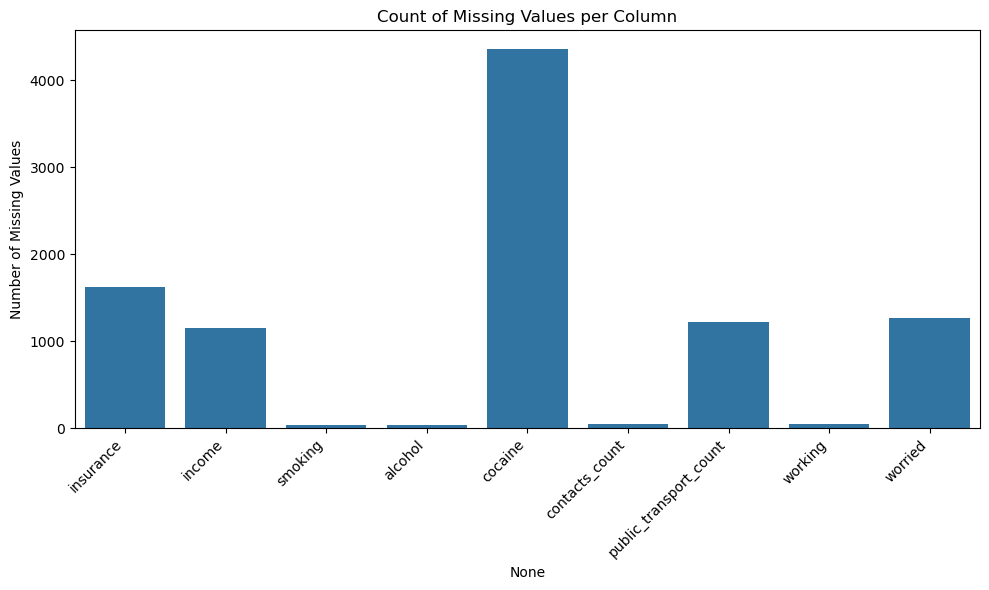

In [204]:
# Again as histogram
print(df.isnull().sum())

# Plotting missing values
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0] # Only plot columns with missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Count of Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.tight_layout()
plt.show()


Potential Anomalies in Numerical Data:

height - Outliers based on IQR:
Number of outliers: 51
Range of outliers: 110 to 238


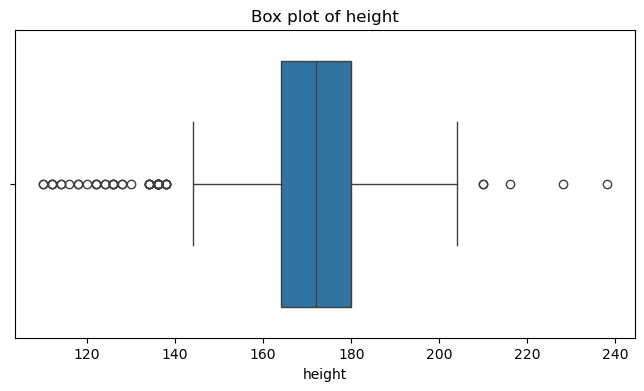


weight - Outliers based on IQR:
Number of outliers: 170
Range of outliers: 140 to 180


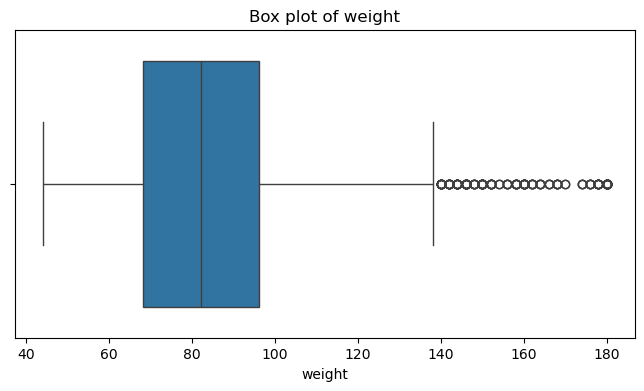


bmi - Outliers based on IQR:
Number of outliers: 258
Range of outliers: 44.3 to 125.0


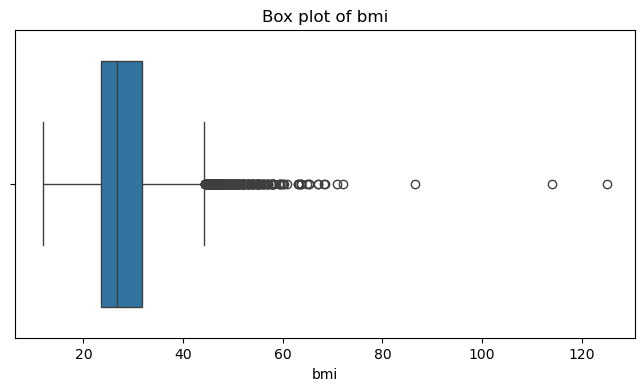


public_transport_count - Outliers based on IQR:
Number of outliers: 410
Range of outliers: 1.0 to 15.0


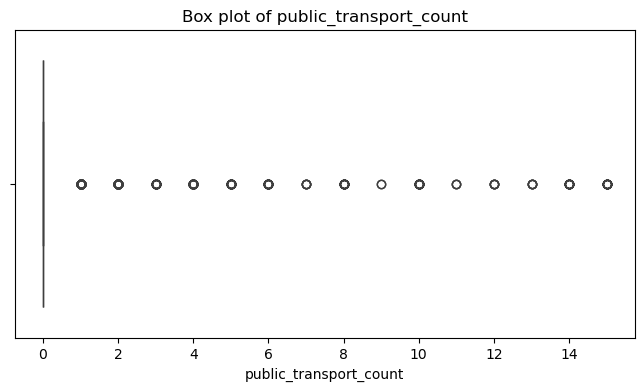

In [205]:
print("Potential Anomalies in Numerical Data:")
for col in ['height', 'weight', 'bmi', 'public_transport_count']:
    print(f"\n{col} - Outliers based on IQR:")
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"Number of outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Range of outliers: {outliers.min()} to {outliers.max()}")

     # Add a box plot for visualization
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box plot of {col}")
    plt.xlabel(col)
    plt.show()


### 3. TODO - Continue clean and transformation at this point....

- Handle missing data in numerical cols - can we fill it with the median?
- For categorical cols, can we use mode or 'uknown'
- Need to handle outliers - do we maybe cap outliers?

### 4. TODO - Visualise changes with histogram

In [ ]:
# NOT COMPLETE....can we use seaborn?
numerical_cols = ['height', 'weight', 'bmi', 'risk_infection', 'risk_mortality']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### 5. Data Preparation Reflection Analysis

Going through the data set we identified mulitple areas data inconsistences attributed to incorrect data entry, missing data and extreme outliers.
We used a combination of visusalisation with matplot lib to identify skewness and distrbution.

In some cases we had to normalise data such as the date format. In other cases we decided to drop features entirely, such as longitude and latitude in order to simplify data exploration.

We opted to fill empty values of categorical features with the mode and ...(GIVE SPECIFIC EXAMPLES...)

